In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("emotions_cleaned_50.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
X = df.text
y = df.label
print(X.head())
print(y.head())

0        i just feel really helpless and heavy hearted
1    ive enjoyed being able to slouch about relax a...
2    i gave up my internship with the dmrg and am f...
3                           i dont know i feel so lost
4    i am a kindergarten teacher and i am thoroughl...
Name: text, dtype: object
0    4
1    0
2    4
3    0
4    4
Name: label, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50001 non-null  int64 
 1   text        50001 non-null  object
 2   label       50001 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50001,)
(45000,)
(5001,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  263520


In [7]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(45000, 263520)
(5001, 263520)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[1249  137    9   41   35    1]
 [ 329 1274   39   31   29    8]
 [  78  151  151   12    6    0]
 [ 200  107    5  337   15    0]
 [ 134   72    5   31  318   17]
 [  37   52    3   10   18   60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.85      0.71      1472
           1       0.71      0.75      0.73      1710
           2       0.71      0.38      0.50       398
           3       0.73      0.51      0.60       664
           4       0.76      0.55      0.64       577
           5       0.70      0.33      0.45       180

    accuracy                           0.68      5001
   macro avg       0.70      0.56      0.60      5001
weighted avg       0.69      0.68      0.67      5001

Accuracy: 0.6776644671065787


Accuracy Score        :  0.6776644671065787
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.85      0.71      1472
           1       0.71      0.75      0.73      1710
           2       0.71      0.38      0.50       398
           3       0.73      0.51      0.60       664
           4       0.76      0.55      0.64       577
           5       0.70      0.33      0.45       180

    accuracy                           0.68      5001
   macro avg       0.70      0.56      0.60      5001
weighted avg       0.69      0.68      0.67      5001



<Axes: >

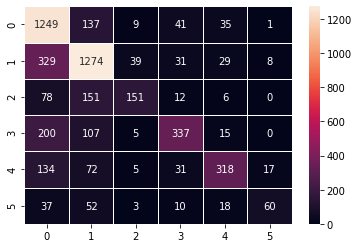

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, ypred))
print("Classification Report : \n", classification_report(y_test, ypred))
cfm=confusion_matrix(y_test,ypred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter tunning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # weighting schemes
    'metric': ['euclidean', 'manhattan']  # distance metrics
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [13]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7080583883223356
